# The History of MLB Baseball

### Eras of Baseball
Throughout the history of Major League baseball, the game has changed and developed. This notebook displays how certain statistics have changed based on the different eras of baseball. There eight different eras of Major League baseball. 
- [<i>19th Century Era (1871-1900)</i>](https://www.baseball-reference.com/bullpen/19th_Century)- The beginning of baseball 
- [<i>Dead Ball Era (1901-1919)</i>](https://www.baseball-reference.com/bullpen/Deadball_Era)- era highly focused on pitching and defense
- [<i>Lively Ball Era (1920-1941)</i>](https://www.baseball-reference.com/bullpen/Lively_ball_era)- era of increased offense
- [<i>Integration Era (1942-1960)</i>](https://www.baseball-reference.com/bullpen/Integration)- integration of MLB
- [<i>Expansion Era (1961-1976)</i>](https://en.wikipedia.org/wiki/1961_Major_League_Baseball_expansion)- addition of two more teams to both the National and American Leagues
- [<i>Free Agency Era (1977-1993)</i>](https://news.illinois.edu/blog/view/6367/198486)- free agency is introduced in MLB
- [<i>Steroid Era (1994-2005)</i>](http://www.espn.com/mlb/topics/_/page/the-steroids-era)- increased offense and widley used PEDs
- <i>Modern Era (2006-Present)</i> - present day MLB

### Data
The database used is Sean Lahman's History of Baseball database. It holds all seasonal statistics from every player that has played in Major League Baseball from 1871 to 2015. In this project only the regular season batting and pitching tabels were used. 

### Questions Seeking Answers
1. How have certain baseball statistics overtime changed?
2. Have the different eras effected these statistics?
3. If so why and how?
4. Are there any relationships among these statistics?



In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import matplotlib as plt
from pylab import *
import seaborn as sns
from sqlalchemy import create_engine
import itertools
import matplotlib.patches as mpatches

# Create connection.
engine = create_engine('sqlite:///:memory:')

In [5]:
batting = pd.DataFrame.from_csv('baseball/batting.csv', index_col = None, encoding = 'utf-8')
batting.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [6]:
#Load pitching data
pitching = pd.DataFrame.from_csv('baseball/pitching.csv', index_col = None, encoding = 'utf-8')
pitching.head()

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [7]:
batting.to_sql('batting', engine, index = False)

In [8]:
pd.read_sql_table('batting', engine).head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,None,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,None,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,None,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,None,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,None,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [9]:
pitching.to_sql('pitching', engine, index = False)
pd.read_sql_table('pitching', engine).head()

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,None,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,None,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,None,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,None,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,None,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [10]:
#Queries to pull data for league wide HR and AVG by year
total_hr = pd.read_sql_query('SELECT year, SUM(hr) AS total_hr FROM batting GROUP BY year', engine)
total_avg = pd.read_sql_query('SELECT year, SUM(ab) AS total_ab, SUM(h) AS total_h FROM batting GROUP BY year', engine)

Batting average is calculated by using the following formula:

<i>Batting Average = Hits / At Bats</i>

In [12]:
#Adding a column to calculate league wide batting average.
ab = total_avg['total_ab']
h = total_avg['total_h']
total_avg['avg'] = (h / ab)
total_avg.head()

,year,total_ab,total_h,avg
0,1871,10822.0,3101.0,0.286546
1,1872,15679.0,4487.0,0.286179
2,1873,16974.0,4923.0,0.290032
3,1874,19104.0,5226.0,0.273555
4,1875,26833.0,6812.0,0.253867


In [27]:
year = total_hr['year']
year.astype('int')
hr = total_hr['total_hr']
year_avg = total_avg['year']
avg = total_avg['avg']

In [25]:
#Query to pull total league strikeouts
df_so = pd.read_sql_query('SELECT year, SUM(so) AS so FROM pitching GROUP BY year', engine)
year_so = df_so['year']
so = df_so['so']
df_so.set_index('year')
df_so.head()

,year,so
0,1871,175
1,1872,252
2,1873,240
3,1874,192
4,1875,387


In [115]:
#Query to pull data for ERA
df_era = pd.read_sql_query('SELECT year, SUM(er) AS total_er, SUM(ipouts) / 3 as total_ip FROM pitching GROUP BY year', engine)
df_era.head()

,year,total_er,total_ip
0,1871,1055,2250.000000
1,1872,1357,3285.333333
2,1873,1295,3584.666667
3,1874,1399,4172.666667
4,1875,1692,6192.333333


The database did not already have each pitchers era, so it needed to be calcualted with this fourmula:

<i>Earned Run Average = (Earned Runs / Innings Pitched) x 9</i>

In [116]:
#Calculations for league wide ERA
df_era['yr_era'] = (df_era['total_er'] / df_era['total_ip']) * 9
year_era = df_era['year']
era = df_era['yr_era']
df_era.head()

,year,total_er,total_ip,yr_era
0,1871,1055,2250.000000,4.220000
1,1872,1357,3285.333333,3.717431
2,1873,1295,3584.666667,3.251348
3,1874,1399,4172.666667,3.017495
4,1875,1692,6192.333333,2.459170


In [16]:
fig = plt.figure(figsize=(8,4), dpi=100)

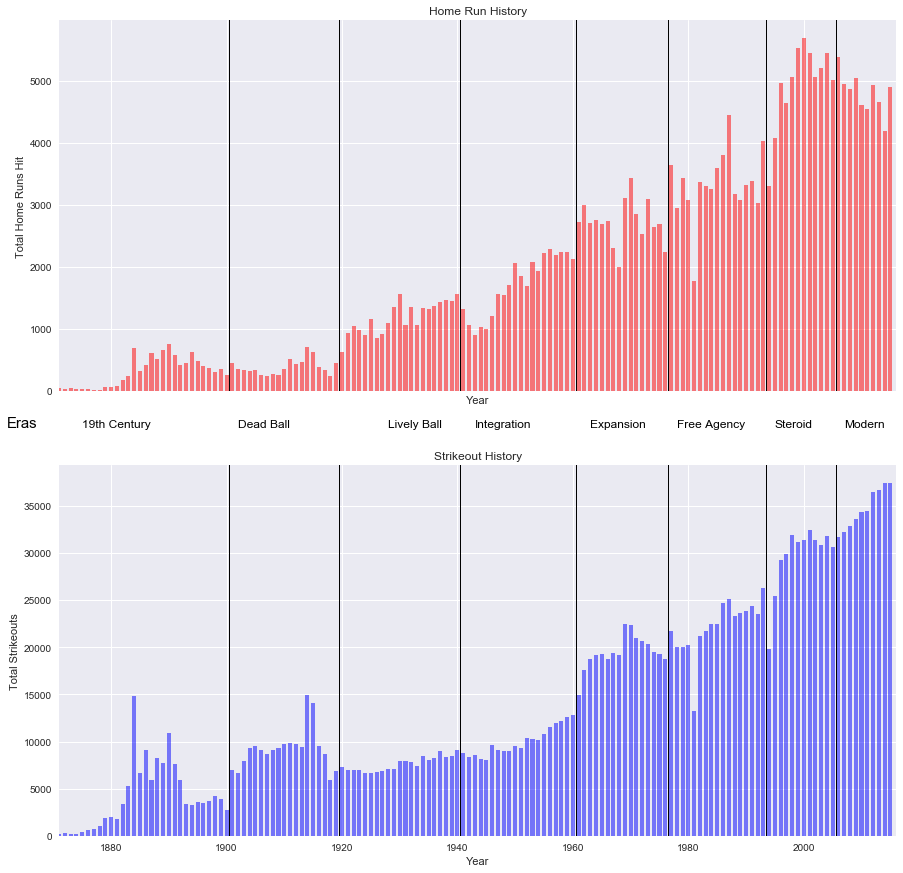

In [122]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (15, 15), sharex = True)

ax1.bar(year, hr, align = 'center', width = .7, alpha = .5, color = 'red')
ax1.set_xlim([1871,2016])
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Home Runs Hit')
ax1.set_title('Home Run History')

ax2.bar(year_so, so, align = 'center', width = .7, alpha = .5, color = 'blue')
ax2.set_xlim([1871,2016])
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Strikeouts')
ax2.set_title('Strikeout History')

for x in year :
    #19th Century
    ax1.axvline(x=1900.5,c="black",linewidth=.5)
    ax2.axvline(x=1900.5,c="black",linewidth=.5)
    #Dead Ball
    ax1.axvline(x=1919.5,c="black",linewidth=.5)
    ax2.axvline(x=1919.5,c="black",linewidth=.5)
    #Lively Ball
    ax1.axvline(x=1940.5,c="black",linewidth=.5)
    ax2.axvline(x=1940.5,c="black",linewidth=.5)    
    #Integration
    ax1.axvline(x=1960.5,c="black",linewidth=.5)
    ax2.axvline(x=1960.5,c="black",linewidth=.5)
    #Expansion
    ax1.axvline(x=1976.5,c="black",linewidth=.5)
    ax2.axvline(x=1976.5,c="black",linewidth=.5) 
    #Free Agency
    ax1.axvline(x=1993.5,c="black",linewidth=.5)
    ax2.axvline(x=1993.5,c="black",linewidth=.5)
    #Steroid
    ax1.axvline(x=2005.5,c="black",linewidth=.5)
    ax2.axvline(x=2005.5,c="black",linewidth=.5)

ax1.text(1875, -575, '19th Century', fontsize = 12, color = 'black')
ax1.text(1902, -575, 'Dead Ball', fontsize = 12, color = 'black')
ax1.text(1928, -575, 'Lively Ball', fontsize = 12, color = 'black')
ax1.text(1943, -575, 'Integration', fontsize = 12, color = 'black')
ax1.text(1963, -575, 'Expansion', fontsize = 12, color = 'black')
ax1.text(1978, -575, 'Free Agency', fontsize = 12, color = 'black')
ax1.text(1995, -575, 'Steroid', fontsize = 12, color = 'black')
ax1.text(2007, -575, 'Modern', fontsize = 12, color = 'black')
ax1.text(1862, -575, 'Eras', fontsize = 15, color = 'black')

## Home Runs
The progression of home runs is obvious from the graph shown above. The first spike in home runs on the 19th Century Era was result of the pitching mound being pushed back to the leangth today of 60 feet 6 inches. During the Dead Ball Era, pitching a defense was emphasized. This obvious due to the low amount of league wide home runs hit. In the transition into the Lively Ball Era, home runs increase immediatley. Offense began taking over as the main focus of the league in this era. Home runs took a dive when World War II. Many of the [MLB's best players](http://www.baseballinwartime.com/those_who_served/those_who_served_atoz.htm) took up arms and went to war. With most of the best players gone, older players or less experienced players took their places after [Franklin D. Roosevelt requested Judge Kenesaw Mountain Landis, the commissioner of baseball](http://ftw.usatoday.com/2014/01/fdr-franklin-roosevelt-letter-to-mlb-commissioner-kenesaw-landis). Once World War II was over, the MLB began to integrate itself. With the addition of amazing talent like Jackie Robinson and Larry Doby, home runs increased again. Home runs increased during the Expansion Era due to the addition of four more teams. With more personel going to bat than ever before home runs were bound to increase. The green line on the graph represents when the mound was lowered and the strike zone shrunk for the 1969 season. It was believed by the league that the pitchers were too good and had too much of an upper hand against hitters. During the Free Agency Era there is a massive drop in the 1981 season. [This was due to a players strike](https://en.wikipedia.org/wiki/1981_Major_League_Baseball_strike). Some of the leagues top hitters were involved in the strike and some games were cancelled, causing the dip in home runs. 2005 was the first year of the Steroid Era. There was an enourmous increase in home runs. With steroids running through the league, players' power increased, increasing the amount of home runs hit.

## Strikeouts
In early baseball, strikeouts dominated league statistics. In the 19th Century and the Dead Ball Eras strikeouts were abnormally high compared to the growth of total strikeouts. This can be attributed to stacked pitching talent and poorer hitting mechanincs compared to today's hitters. Another spike occured in the Expansion Era due to the increase of players with the additoin of two teams to both the National and American Leagues. Probably the most interesting observation is the increase in modern day baseball and its comparison to the amount of home runs hit.

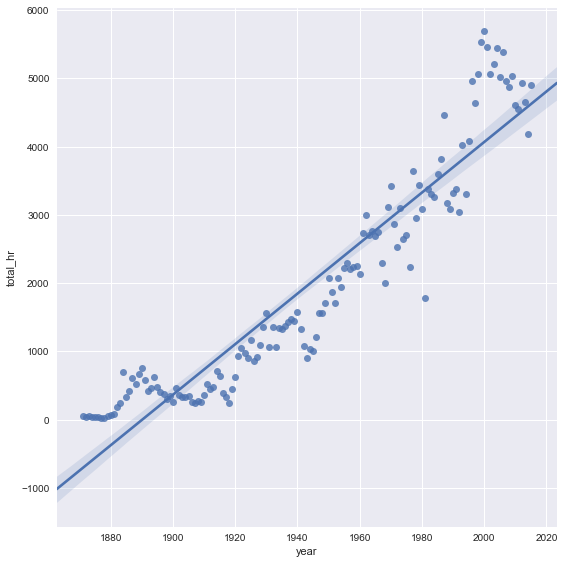

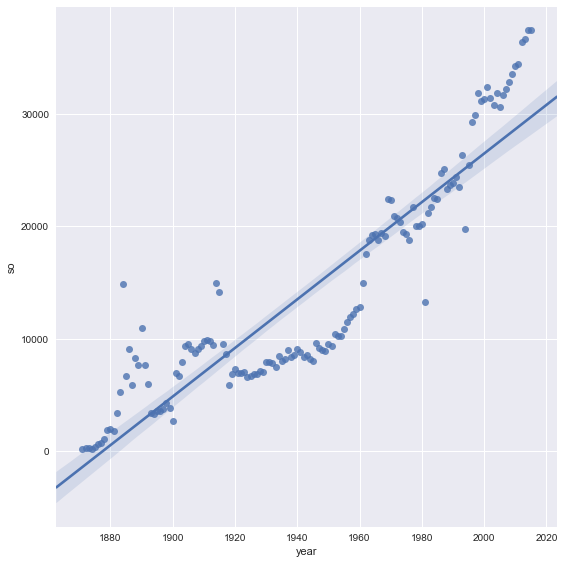

In [18]:
hr_so = pd.merge(total_hr, df_so, on = 'year')

sns.set()
ax1 = sns.lmplot(x="year", y="total_hr", truncate=False, size=8, data=hr_so)
ax2 = sns.lmplot(x="year", y="so", truncate=False, size=8, data=hr_so)


## What To Takeaway
When comparing total strikeouts and home runs share a relationship over the history of baseball. This can be attributed to the culture shift in baseball. When swinging for the fences, batters take more of a risk of swinging and missing. Taking this risk has rewarded batters wit hmore home runs but they have suffered the consequences of striking out more.

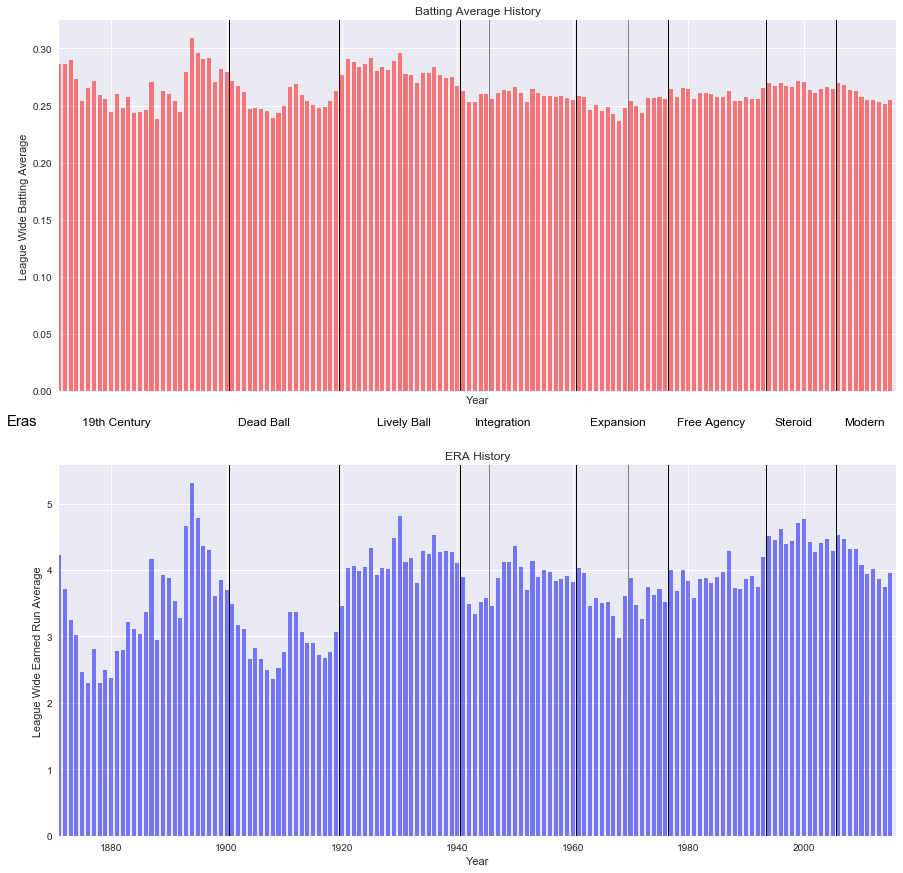

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (15, 15), sharex = True)

ax1.bar(year_avg, avg, align = 'center', width = .7, alpha = .5, color = 'red')
ax1.set_xlim([1871,2016])
ax1.set_xlabel('Year')
ax1.set_ylabel('League Wide Batting Average')
ax1.set_title('Batting Average History')

ax2.bar(year_era, era, align = 'center', width = .7, alpha = .5, color = 'blue')
ax2.set_xlim([1871,2016])
ax2.set_xlabel('Year')
ax2.set_ylabel('League Wide Earned Run Average')
ax2.set_title('ERA History')

for x in year :
    #WWII
    ax1.axvline(x=1940.5,c="black",linewidth=.5)
    ax1.axvline(x=1945.5,c="grey",linewidth=.5)
    ax2.axvline(x=1940.5,c="black",linewidth=.5)
    ax2.axvline(x=1945.5,c="grey",linewidth=.5)
    #19th Century
    ax1.axvline(x=1900.5,c="black",linewidth=.5)
    ax2.axvline(x=1900.5,c="black",linewidth=.5)
    #Dead Ball
    ax1.axvline(x=1919.5,c="black",linewidth=.5)
    ax2.axvline(x=1919.5,c="black",linewidth=.5)
    #Lively Ball
    ax1.axvline(x=1940.5,c="black",linewidth=.5)
    ax2.axvline(x=1940.5,c="black",linewidth=.5)    
    #Integration
    ax1.axvline(x=1960.5,c="black",linewidth=.5)
    ax2.axvline(x=1960.5,c="black",linewidth=.5)
    #Expansion
    ax1.axvline(x=1976.5,c="black",linewidth=.5)
    ax2.axvline(x=1976.5,c="black",linewidth=.5) 
    #Free Agency
    ax1.axvline(x=1993.5,c="black",linewidth=.5)
    ax2.axvline(x=1993.5,c="black",linewidth=.5)
    #Steroid
    ax1.axvline(x=2005.5,c="black",linewidth=.5)
    ax2.axvline(x=2005.5,c="black",linewidth=.5)
    #lowered Mound
    ax1.axvline(x=1969.5,c="grey",linewidth=.5)
    ax2.axvline(x=1969.5,c="grey",linewidth=.5) 

ax1.text(1875, -.03, '19th Century', fontsize = 12, color = 'black')
ax1.text(1902, -.03, 'Dead Ball', fontsize = 12, color = 'black')
ax1.text(1926, -.03, 'Lively Ball', fontsize = 12, color = 'black')
ax1.text(1943, -.03, 'Integration', fontsize = 12, color = 'black')
ax1.text(1963, -.03, 'Expansion', fontsize = 12, color = 'black')
ax1.text(1978, -.03, 'Free Agency', fontsize = 12, color = 'black')
ax1.text(1995, -.03, 'Steroid', fontsize = 12, color = 'black')
ax1.text(2007, -.03, 'Modern', fontsize = 12, color = 'black')
ax1.text(1862, -.03, 'Eras', fontsize = 15, color = 'black')

## Batting Average
In the early years of baseball, there was significant fluctuation in the league's batting average. In the 19th Century the batting averages increased when the league decided to push the mound back. Giving the hitters more time to react to a pitch proved to be an advatage for the hitters. Ounce the Dead Ball Era began the averages plumitted in due part to an increased focus in pitching and hitting. This can support the idea that after the mound was pushed back, and offense dominated the sport, teams over compensated by increasing their defensive ability before their offensive ability. After the Dead Ball Era there is a spike in the Lively Ball Era, but for the most part the league average levels out to arround .250.

## Earned Run Average
The first thing noticed in the ERA graph is how it correlates with the league's batting average in the early years of the game. Earned Run Average, or ERA, is the statistic that reveals how many earned runs a pitcher allows for every nine innings pitched. This statistics is a good indication on how well the putcher prevents runs from scoring, therefore, the lower the ERA the better. In the early eras of baseball contact hitting was the major philosophy for hitters. Just getting base hits was the main priority, so this is how many teams scored their runs. This is why batting average and ERA appear to have a relationship with each other. However, the relationship is not so apparent later on. After World War II, you can see ERA increasing over time, but batting average is staying the same. There appears to be more of a relationship with home runs than batting average. As home runs go up, ERA goes up, and vise versa.

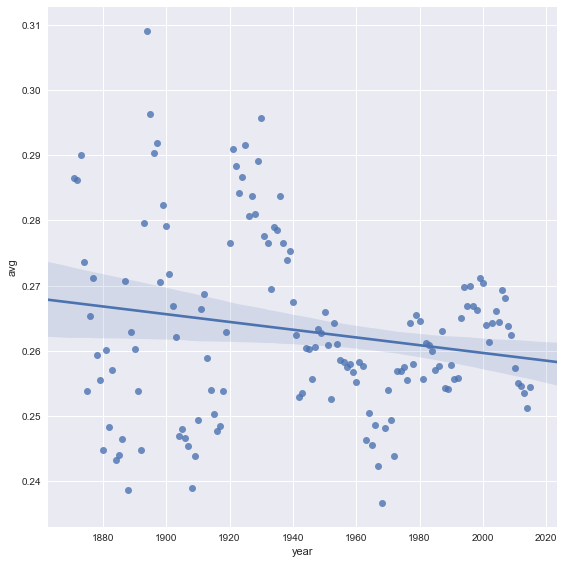

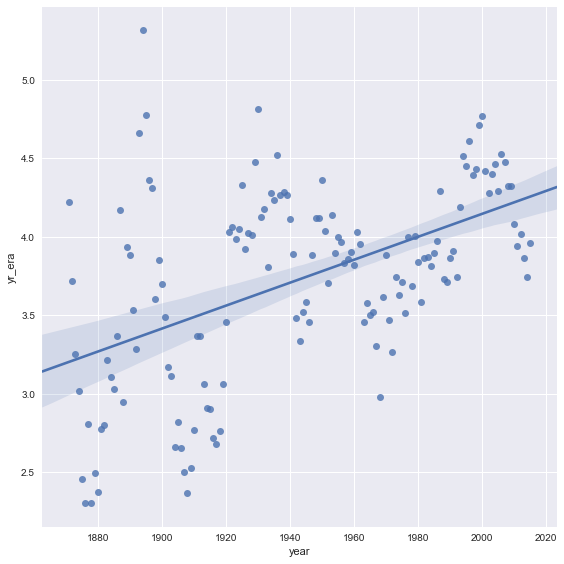

In [23]:
sns.set()
ax1 = sns.lmplot(x="year", y="avg", truncate=False, size=8, data=total_avg)

ax2 = sns.lmplot(x="year", y="yr_era", truncate=False, size=8, data=df_era)

## What To Take Away
The most interseting aspect of this comparison between average and ERA is how the relationship disolves over time and ERA gains more of a relationship with home runs. From the scatter plots it is obvious that that batting average is declining, but ERA is rising at a much greater pace.

## Modern Day Baseball
By looking at the graphs above. it is obvious that Modern Day baseball is showing a different trend from the eras that came before it.

In [109]:
fig = plt.figure(figsize=(10,10), dpi=100)

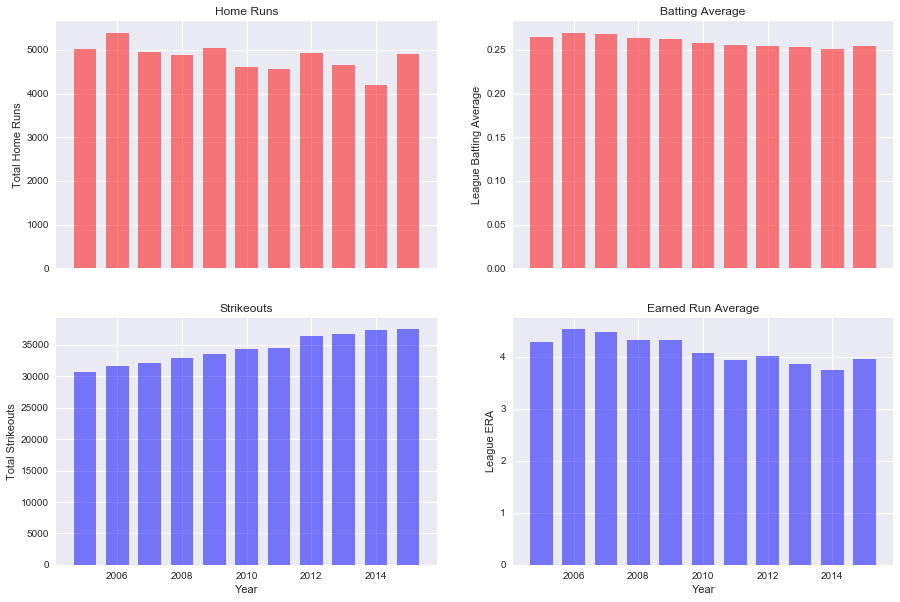

In [121]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10), sharex = True)
modern_hr = total_hr.loc[year >= 2005, :]
modern_hr = modern_hr.reset_index()
modern_avg = total_avg.loc[year >= 2005, :].reset_index()
modern_so = df_so.loc[year >= 2005, :].reset_index()
modern_era = df_era.loc[year >= 2005, :].reset_index()

ax[0,0].bar(modern_hr['year'], modern_hr['total_hr'], align = 'center', width = .7, alpha = .5, color = 'red')
ax[0,0].set_ylabel('Total Home Runs')
ax[0,0].set_title('Home Runs')
ax[0,1].bar(modern_avg['year'], modern_avg['avg'], align = 'center', width = .7, alpha = .5, color = 'red')
ax[0,1].set_ylabel('League Batting Average')
ax[0,1].set_title('Batting Average')
ax[1,0].bar(modern_so['year'], modern_so['so'], align = 'center', width = .7, alpha = .5, color = 'blue')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Total Strikeouts')
ax[1,0].set_title('Strikeouts')
ax[1,1].bar(modern_era['year'], modern_era['yr_era'], align = 'center', width = .7, alpha = .5, color = 'blue')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('League ERA')
ax[1,1].set_title('Earned Run Average')

From the graphs shown. It is obvious that there is a decline in offensive production and a rise in pitching. Home runs vary year to year but still show signs of a decline. Batting average shows a consistent decline over the ten year stretch. Both pitching stats shown significant improvemt in modern day baseball, with total strikeouts incresing by over 5000 in just ten years. With the increase in strikeouts and decrease in offense, ERA must go down, as the Earned Run Average graph shows.

## Conclusion

### Eras
The game of baseball has changed significantly over time. With the culture change in baseball, the statistics recorded year to year have changed since baseball began. Hitters are shooting for the long ball and pitchers are aiming to ring them on a called third strike more so than ever. Examining the data from era to era provides insight on how events from society and changed in the rules of teh game can effect stats as well. With all these changes there are a few questions that must be asked moving forward.
- Can players from different eras really be compared to each other?
- What caused the culture of baseball to have a hitting philosophy based on contact shift to power?
- Has the culture shift actually improved offensive production?

### Modern Day
In regards to how dominance in power hitting of modern day baseball, has swinging for the fences improved offensive production? The data shows that there has been a decline in offense as more and more hitters thirst for power. Pitchers' strikeout numbers are improving and ERAs are dropping while hitters averages fall along with their home runs numbers. Is it more beneficial for hitters to focus on contact rather than power? Maybe. Maybe not. But the numbers show the age of long ball goes to the pitchers.